In [62]:
import quandl as qndl
import datetime as dtime
import numpy as nmpy
from sklearn import cross_validation
# Getting the Goldman Sachs stock dataset for approx 4-month period:
qndl.ApiConfig.api_key = "BzNAayz31Jj9WMqB1NNk"
stock_prices_df = qndl.get("EOD/GS", start_date = "2018-08-05", end_date = "2018-12-05", collapse = "daily")
print(stock_prices_df)

              Open      High       Low   Close     Volume  Dividend  Split  \
Date                                                                         
2018-08-06  234.14  236.9800  234.0300  235.93  2259700.0       0.0    1.0   
2018-08-07  237.25  239.4600  236.4900  237.83  2399530.0       0.0    1.0   
2018-08-08  238.12  239.1600  236.2300  236.37  2522353.0       0.0    1.0   
2018-08-09  236.35  236.8450  233.3900  233.78  2952021.0       0.0    1.0   
2018-08-10  230.97  231.4550  228.1100  229.61  3863732.0       0.0    1.0   
2018-08-13  229.49  229.8900  226.5700  226.86  2662772.0       0.0    1.0   
2018-08-14  227.35  230.3700  227.3000  229.56  2357141.0       0.0    1.0   
2018-08-15  229.35  231.5400  228.3100  229.25  3218716.0       0.0    1.0   
2018-08-16  230.67  233.2900  230.4500  233.00  2435929.0       0.0    1.0   
2018-08-17  232.51  233.7200  231.6400  233.38  2107233.0       0.0    1.0   
2018-08-20  234.13  235.9750  234.0750  235.78  2604865.0       

In [63]:

from sklearn.model_selection import train_test_split

stock_prices_df = stock_prices_df.reset_index() # Assigned indices correspond to individual rows in the dataframe
out_stockprices = stock_prices_df['Adj_Close'].tolist() #The Adj_Close column of the stock dataframe is converted to a list
in_datetime = stock_prices_df.index.tolist() #Date can be represented in terms of the indexed rows, where 0 refers to 2018-06-01

#Defining empty training and testing
train_date,test_date,train_stock_prices, test_stock_prices = ([] for i in range(4))

#Applied cross-validation to obtain more random data for training/testing sets
train_date, test_date, train_stock_prices, test_stock_prices = cross_validation.train_test_split(in_datetime, out_stockprices, train_size = 0.75, test_size = 0.25) #The training and testing datasets are split accordingly

#The lists are converted to numpy arrays
train_date = nmpy.array(train_date)
test_date = nmpy.array(test_date)
train_stock_prices = nmpy.array(train_stock_prices)
test_stock_prices = nmpy.array(test_stock_prices)

#Reshaped values as we used single feature
train_date= nmpy.reshape(train_date, (len(train_date), 1))
test_date = nmpy.reshape(test_date, (len(test_date), 1))

print(train_date)
print(test_date)
print(train_stock_prices)
print(test_stock_prices)


[[35]
 [10]
 [51]
 [61]
 [47]
 [ 1]
 [39]
 [54]
 [14]
 [27]
 [64]
 [16]
 [26]
 [ 5]
 [56]
 [42]
 [37]
 [41]
 [ 4]
 [12]
 [46]
 [15]
 [ 3]
 [45]
 [11]
 [58]
 [43]
 [57]
 [53]
 [20]
 [ 7]
 [31]
 [18]
 [22]
 [30]
 [29]
 [36]
 [32]
 [23]
 [59]
 [50]
 [19]
 [ 6]
 [ 0]
 [44]
 [40]
 [63]
 [ 9]]
[[48]
 [17]
 [21]
 [49]
 [60]
 [33]
 [55]
 [13]
 [52]
 [62]
 [ 8]
 [ 2]
 [38]
 [28]
 [25]
 [24]
 [34]]
[230.60638839 233.08722277 226.42075846 223.53445915 211.23545177
 235.1138103  223.49478493 219.79516416 232.42487466 226.47035123
 226.85717485 239.60196023 226.29181726 224.26909559 207.47631967
 225.62727412 225.88515653 225.92483075 226.98768861 236.60656501
 213.1398142  239.82933347 231.11006421 221.09449478 235.92444531
 210.63041995 223.87169    212.26698142 225.11150929 235.72436243
 226.63180007 233.66130313 237.45019089 232.60993637 227.02579028
 226.03393484 227.01587172 235.46648002 232.00490456 212.74307203
 219.89434971 235.87314075 226.93825965 233.23550967 223.51462204
 224.22875795 

In [64]:
from sklearn.linear_model import LinearRegression as linReg

lin_reg = linReg()# Created linear regression object
lin_reg.fit(train_date, train_stock_prices)# Linear Regression model is fit to training Data
score=lin_reg.score(test_date,test_stock_prices)
pred_stock_prices = lin_reg.predict(test_date)# Made predictions using the testing set

print(pred_stock_prices)


[222.3079656  230.84933523 229.74722302 222.03243754 219.00162897
 226.44088639 220.37926923 231.95144744 221.20585339 218.45057286
 233.3290877  234.98225602 225.06324612 227.81852665 228.64511081
 228.92063886 226.16535833]


In [65]:
print(lin_reg.score(test_date, test_stock_prices)*100)#Checked accuracy of prediction

57.172940939531955


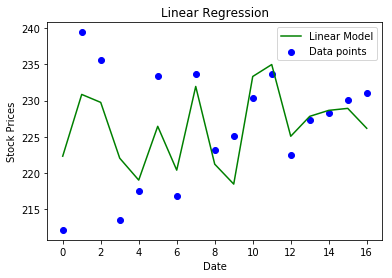

In [66]:
import matplotlib.pyplot as plot

# Plotted outputs for Linear Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "blue", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_stock_prices, color = "green", label = "Linear Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Linear Regression")
plot.legend()
plot.show()

In [67]:
from sklearn import svm
# Created linear Support Vector Regression object
lin= svm.SVR(kernel='linear',C=1000)
lin.fit(train_date, train_stock_prices)# Linear Support Vector Regression model is fit to training Data
pred_lin_stock=lin.predict(test_date)# Made predictions using the testing set
print(pred_lin_stock)

[222.53562778 230.89783327 229.81883902 222.26587922 219.29864501
 226.58185625 220.64738784 231.97682753 221.45663353 218.75914789
 233.32557035 234.94406174 225.23311343 227.93059907 228.73984476
 229.00959332 226.31210768]


In [68]:
scratch=lin.score(test_date,test_stock_prices)*100 #Checked accuracy of prediction

print(scratch)

56.93012796925041


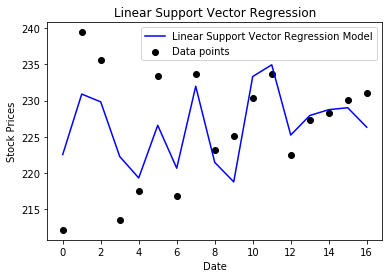

In [69]:
import matplotlib.pyplot as plot

# Plot outputs for Linear Support Vector Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "black", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_lin_stock, color = "blue", label = "Linear Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Linear Support Vector Regression")
plot.legend()
plot.show()

In [70]:
from sklearn.svm import SVR

poly_svr = SVR(kernel = 'poly', C = 1000, degree = 2)#Created Polynomial Support Vector Regression model object
poly_svr.fit(train_date, train_stock_prices)#Poly Support Vector Regression model is fit to training Data
pred_poly_stock=poly_svr.predict(test_date) #Made predictions using the testing set

print(pred_poly_stock)

[221.62631166 232.01298868 231.22947728 221.12630784 214.94584977
 227.88924539 217.90978753 232.63154995 219.56443917 213.68810975
 233.17279121 233.48207195 226.05933416 229.4614228  230.2810167
 230.53359592 227.54388272]


In [71]:
print(poly_svr.score(test_date, test_stock_prices)*100)#Checked accuracy of prediction

56.69474017594217


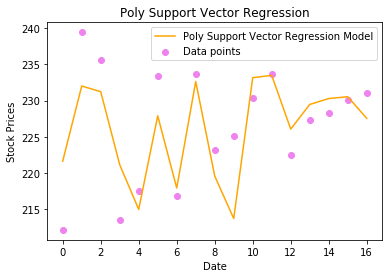

In [72]:
import matplotlib.pyplot as plot

# Plot outputs for Poly Support Vector Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "violet", label = "Data points")
plot.plot(range(len(test_stock_prices)),pred_poly_stock, color = "orange", label = "Poly Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Poly Support Vector Regression")
plot.legend()
plot.show()

In [73]:
from sklearn.svm import SVR

rbf_svr = SVR(kernel = 'rbf', C = 1000, gamma = 0.1) #Created Rbf support vector regression object
rbf_svr.fit(train_date, train_stock_prices)#Rbf Support Vector Regression model is fit to training Data
pred_rbf_stock = rbf_svr.predict(test_date) #Made predictions using the testing set

print(pred_rbf_stock)

[209.65491905 239.76592954 234.3857727  212.88191296 216.99462999
 236.86401061 212.35756146 233.79124587 227.84067906 227.76695169
 228.80545301 234.48591368 224.70551784 226.69272222 228.25561065
 230.77898946 234.7114478 ]


In [74]:
print(rbf_svr.score(test_date, test_stock_prices)*100) #Checked accuracy of prediction

91.08864997003955


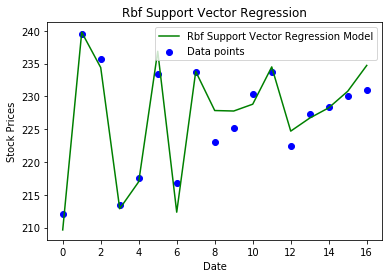

In [75]:
import matplotlib.pyplot as plot

# Plot outputs for Rbf Support Vector Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "blue", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_rbf_stock, color = "green", label = "Rbf Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Rbf Support Vector Regression")
plot.legend()
plot.show()

In [76]:
from sklearn.ensemble import RandomForestRegressor

rand_for_reg = RandomForestRegressor(n_estimators = 500, random_state = 42)#Created Random Forest regressor object
rand_for_reg.fit(train_date, train_stock_prices)#Random Forest regressor model is fit to training Data
pred_stock_prices = rand_for_reg.predict(test_date)#Made predictions using the testing set

print(pred_stock_prices)

[213.1081145  238.78954971 235.0234766  218.16971148 215.24655482
 234.20031705 217.34899078 235.51339405 225.11206473 224.48852489
 227.82671562 233.52710101 225.36066337 226.58487086 227.9685687
 231.43762276 231.35765937]


In [77]:
print(rand_for_reg.score(test_date, test_stock_prices)*100)#Checked accuracy of prediction

94.6208889822281


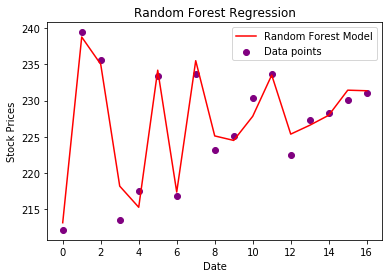

In [78]:
import matplotlib.pyplot as plot

# Plot outputs for Random Forest Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "purple", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_stock_prices, color = "red", label = "Random Forest Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Random Forest Regression")
plot.legend()
plot.show()